# 순환 신경망

먼저 실행 권장(코랩): https://teddylee777.github.io/colab/google-colab-%EB%9F%B0%ED%83%80%EC%9E%84-%EC%97%B0%EA%B2%B0%EB%81%8A%EA%B9%80%EB%B0%A9%EC%A7%80    

> function ClickConnect(){   
    console.log("코랩 연결 끊김 방지");    
    document.querySelector("colab-toolbar-button#connect").click()    
}   
setInterval(ClickConnect, 60 * 1000)   


__런타임 GPU 확인__

## RNN(Recurrent Neural Network)   
※ 참고자료: https://davinci-ai.tistory.com/30
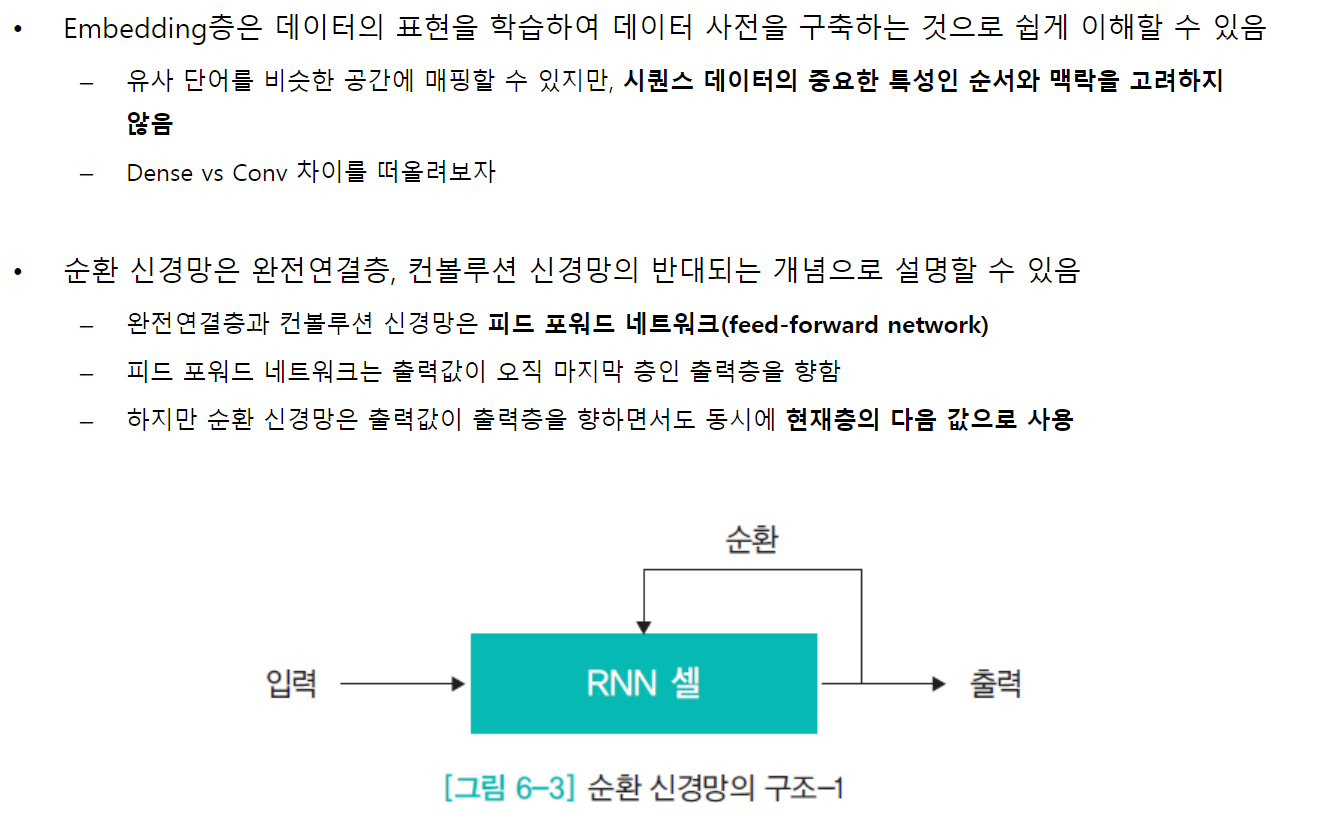

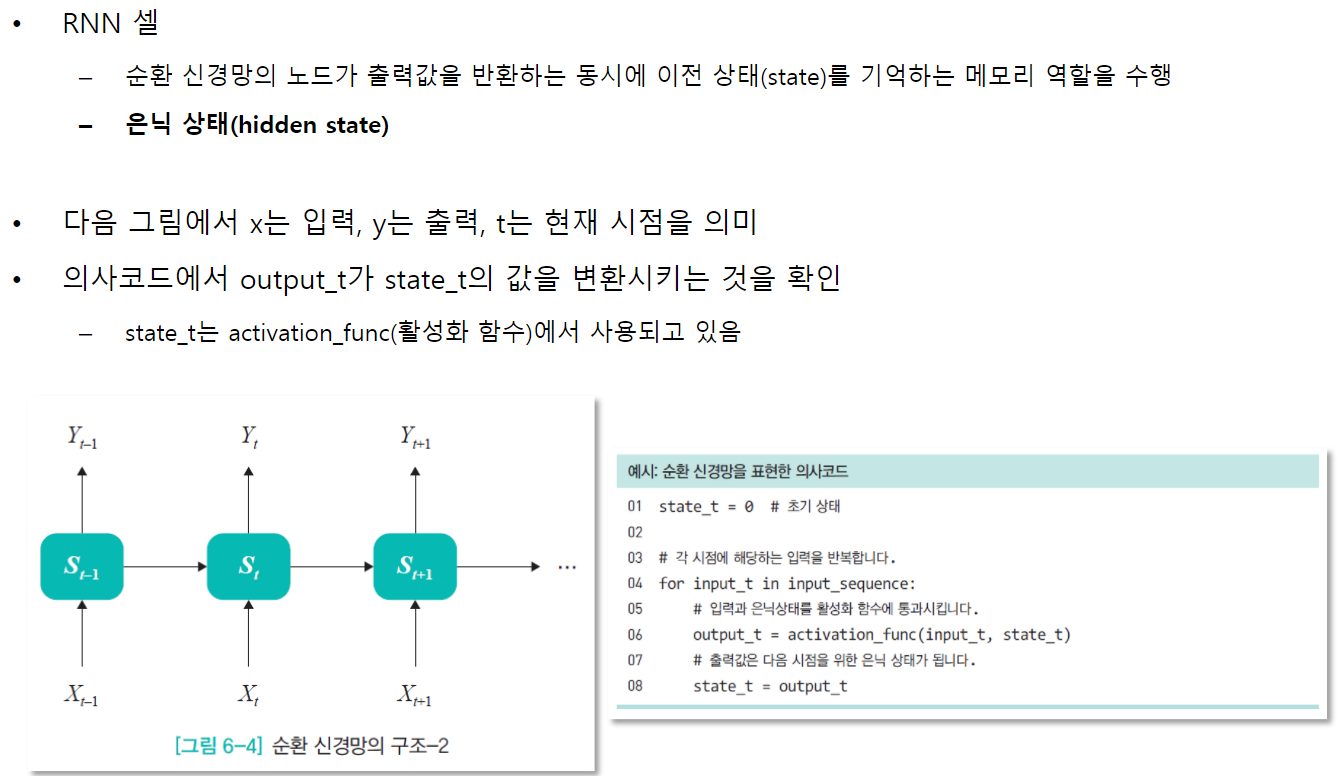

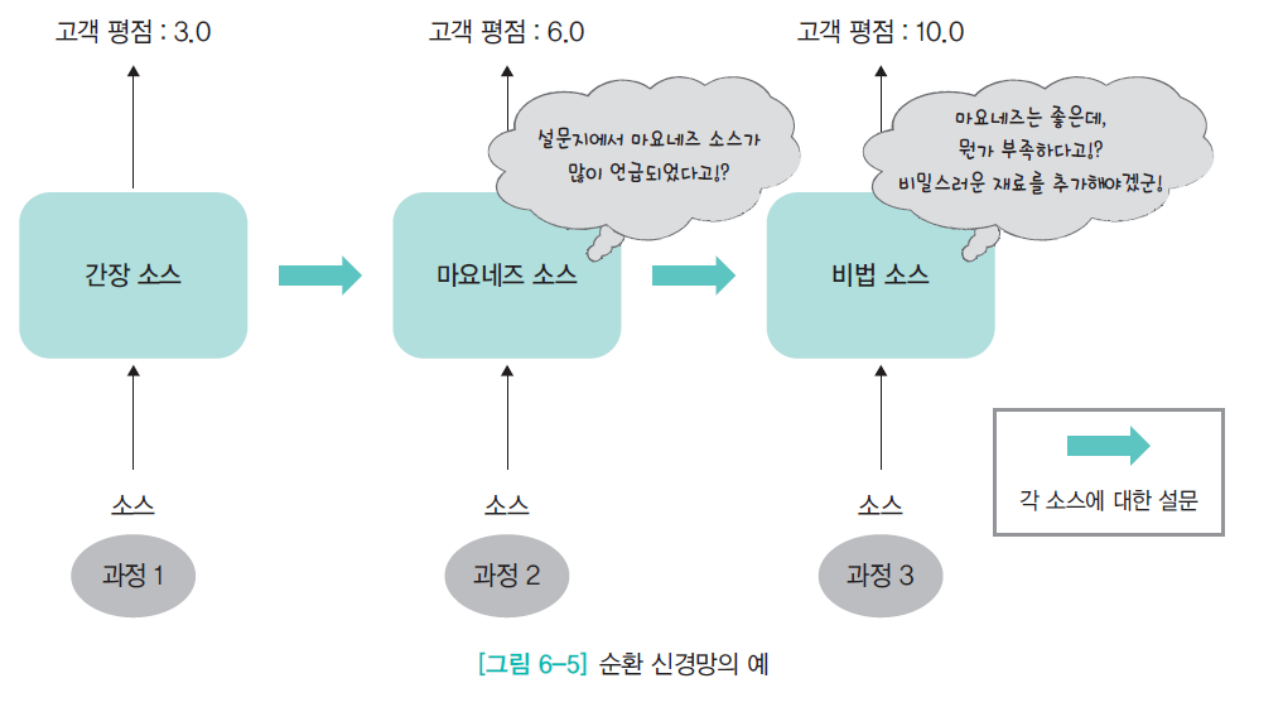

### cos 함수를 이용하여 데이터 만들기   
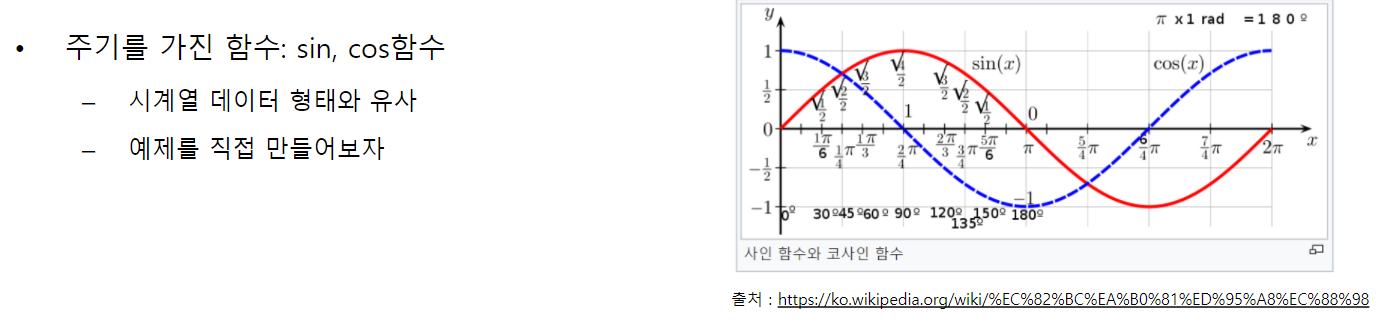    
- 360일 데이터, 주기는 한달(30일)

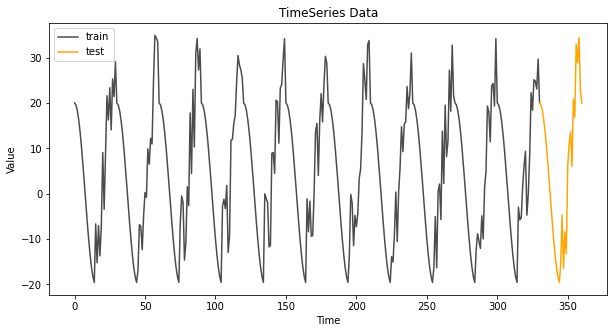

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)

time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time < 0.5, 
                          np.cos(2 * np.pi * month_time),
                          np.cos(2 * np.pi * month_time) + np.random.random(361))


plt.figure(figsize = (10, 5))
plt.title('TimeSeries Data')
plt.xlabel('Time')
plt.ylabel('Value')
# 학습용 데이터
plt.plot(np.arange(0, 30 * 11 + 1), time_series[:30 * 11 + 1], 
         color = 'black', alpha = 0.7, label = 'train')
# 테스트용 데이터
plt.plot(np.arange(30 * 11, 30 * 12 + 1), time_series[30 * 11:], 
         color = 'orange', label = 'test')
plt.legend()

### 전처리 과정 수행하기
- 시간적 순서가 존재하도록 make_sequence() 함수 정의

In [ ]:
def make_sequence(time_series, n):
    x_train, y_train = list(), list()
    
    for i in range(len(time_series)):
        x = time_series[i:(i + n)]
        if (i + n) < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i + n])
        else:
            break
            
    return np.array(x_train), np.array(y_train)

In [ ]:
n = 10 # 주기 설정
x_train, y_train = make_sequence(time_series, n)

In [ ]:
x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)

In [ ]:
# 학습용 및 테스트용 데이터 분리
patial_x_train = x_train[:30 * 11]
patial_y_train = y_train[:30 * 11]
x_test = x_train[30 * 11:]
y_test = y_train[30 * 11:]

print('partial_train:', patial_x_train.shape, patial_y_train.shape) 
print('test:',x_test.shape, y_test.shape)

partial_train: (330, 10, 1) (330, 1)
test: (21, 10, 1) (21, 1)


### 데이터 형태 확인하기

In [ ]:
test_arr = np.arange(100)
a, b = make_sequence(test_arr, 10)

for i in range(20):
    print(a[i],'|', b[i])

[0 1 2 3 4 5 6 7 8 9] | 10
[ 1  2  3  4  5  6  7  8  9 10] | 11
[ 2  3  4  5  6  7  8  9 10 11] | 12
[ 3  4  5  6  7  8  9 10 11 12] | 13
[ 4  5  6  7  8  9 10 11 12 13] | 14
[ 5  6  7  8  9 10 11 12 13 14] | 15
[ 6  7  8  9 10 11 12 13 14 15] | 16
[ 7  8  9 10 11 12 13 14 15 16] | 17
[ 8  9 10 11 12 13 14 15 16 17] | 18
[ 9 10 11 12 13 14 15 16 17 18] | 19
[10 11 12 13 14 15 16 17 18 19] | 20
[11 12 13 14 15 16 17 18 19 20] | 21
[12 13 14 15 16 17 18 19 20 21] | 22
[13 14 15 16 17 18 19 20 21 22] | 23
[14 15 16 17 18 19 20 21 22 23] | 24
[15 16 17 18 19 20 21 22 23 24] | 25
[16 17 18 19 20 21 22 23 24 25] | 26
[17 18 19 20 21 22 23 24 25 26] | 27
[18 19 20 21 22 23 24 25 26 27] | 28
[19 20 21 22 23 24 25 26 27 28] | 29


### SimpleRNN을 사용하여 모델 구성하기
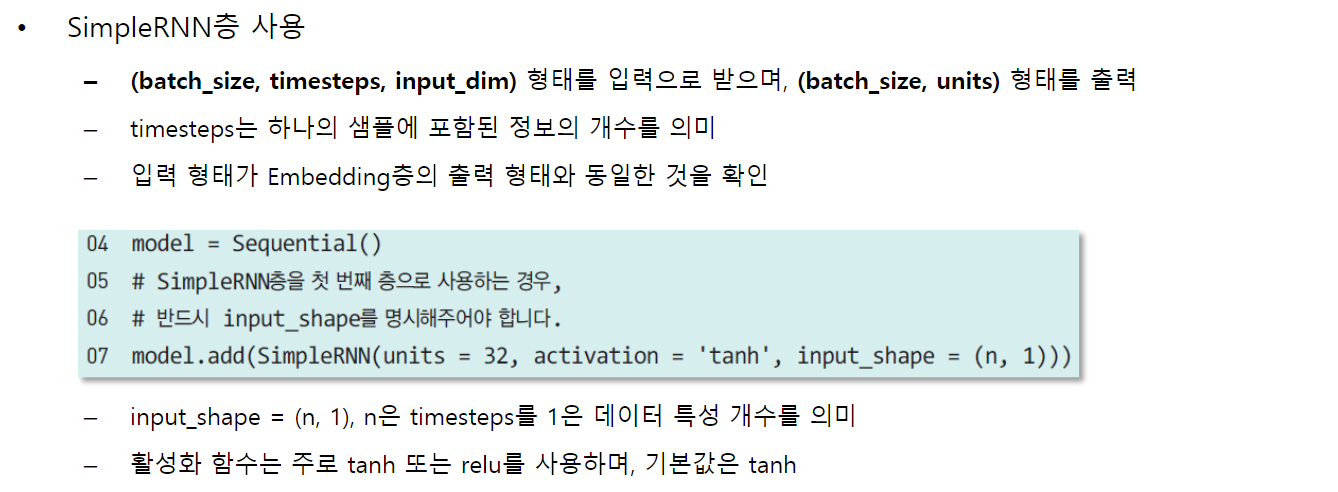

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()

# SimpleRNN 층을 첫 번째 층으로 사용하는 경우,
# 반드시 input_shape를 명시해주어야 합니다.
model.add(SimpleRNN(units = 32, activation = 'tanh', input_shape = (n, 1)))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                1088      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


### 모델 학습시키기

In [ ]:
model.fit(patial_x_train, patial_y_train, epochs = 200, batch_size = 12)

Epoch 1/200
28/28 [==============================] - 1s 3ms/step - loss: 207.6037
Epoch 2/200
28/28 [==============================] - 0s 3ms/step - loss: 181.2278
Epoch 3/200
28/28 [==============================] - 0s 3ms/step - loss: 158.7347
Epoch 4/200
28/28 [==============================] - 0s 3ms/step - loss: 137.5016
Epoch 5/200
28/28 [==============================] - 0s 4ms/step - loss: 122.2962
Epoch 6/200
28/28 [==============================] - 0s 3ms/step - loss: 110.1179
Epoch 7/200
28/28 [==============================] - 0s 4ms/step - loss: 102.3311
Epoch 8/200
28/28 [==============================] - 0s 3ms/step - loss: 95.7411
Epoch 9/200
28/28 [==============================] - 0s 3ms/step - loss: 89.9890
Epoch 10/200
28/28 [==============================] - 0s 3ms/step - loss: 85.0159
Epoch 11/200
28/28 [==============================] - 0s 3ms/step - loss: 80.6295
Epoch 12/200
28/28 [==============================] - 0s 3ms/step - loss: 77.0679
Epoch 13/200
28/28

### 예측 결과 그려보기

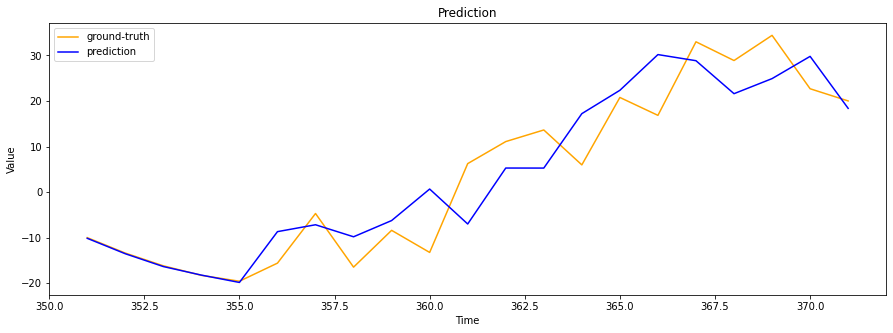

In [ ]:
pred = model.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train) + len(pred))

plt.figure(figsize=(15,5))
plt.title('Prediction')
plt.xlabel('Time'); plt.ylabel('Value')
plt.plot(pred_range, y_test.reshape(-1,), color='orange', label='ground-truth')
plt.plot(pred_range, pred.reshape(-1,), color='blue', label='prediction')
plt.legend()
plt.show()

### IMDB 데이터셋 사용하기

In [ ]:
from tensorflow.keras.datasets import imdb

# 1 ~ 10,000 빈도 순위에 해당하는 단어만 사용합니다.
num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 각 데이터의 최대 길이를 500으로 동일하게 맞춰줍니다.
max_len = 500

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

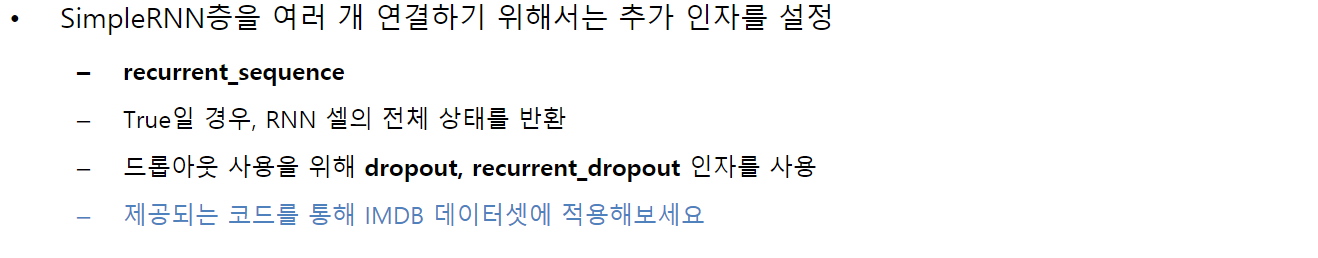    
- dropout 은 층의 입력에 대한 드롭아웃 비율을 정하는 부동 소수 값입니다.
- recurrent_dropout 은 순환 상태의 드롭아웃 비율

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding  

model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 32))
# 새로운 인자 3개가 사용되었습니다.
# return_sequences, dropout, recurrent_dropout
model.add(SimpleRNN(32, return_sequences = True, dropout = 0.15, recurrent_dropout = 0.15))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

# model.summary()
history = model.fit(pad_X_train, y_train, 
                    batch_size = 32, epochs = 15, 
                    validation_split = 0.2)

Epoch 1/15
625/625 [==============================] - 132s 210ms/step - loss: 0.7002 - acc: 0.5063 - val_loss: 0.6914 - val_acc: 0.4996
Epoch 2/15
625/625 [==============================] - 133s 212ms/step - loss: 0.6679 - acc: 0.5771 - val_loss: 0.4997 - val_acc: 0.7612
Epoch 3/15
625/625 [==============================] - 132s 212ms/step - loss: 0.5915 - acc: 0.6890 - val_loss: 0.5323 - val_acc: 0.7558
Epoch 4/15
625/625 [==============================] - 133s 213ms/step - loss: 0.5664 - acc: 0.7037 - val_loss: 0.4604 - val_acc: 0.8060
Epoch 5/15
625/625 [==============================] - 135s 216ms/step - loss: 0.4271 - acc: 0.8126 - val_loss: 0.6613 - val_acc: 0.7300
Epoch 6/15
625/625 [==============================] - 136s 218ms/step - loss: 0.5104 - acc: 0.7527 - val_loss: 0.7116 - val_acc: 0.6314
Epoch 7/15
625/625 [==============================] - 135s 216ms/step - loss: 0.3834 - acc: 0.8354 - val_loss: 0.4825 - val_acc: 0.8040
Epoch 8/15
625/625 [============================

#### 학습 과정 그리기

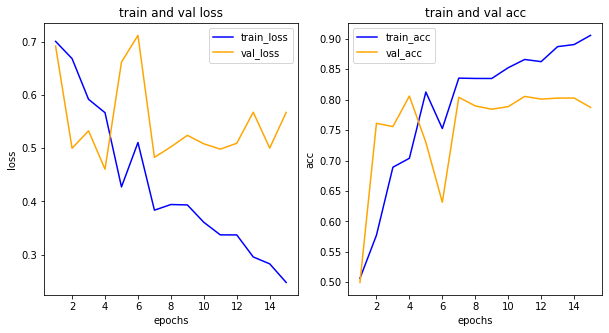

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

#### SimpleRNN 층의 출력값 변화 확인하기(시퀀스 출력)
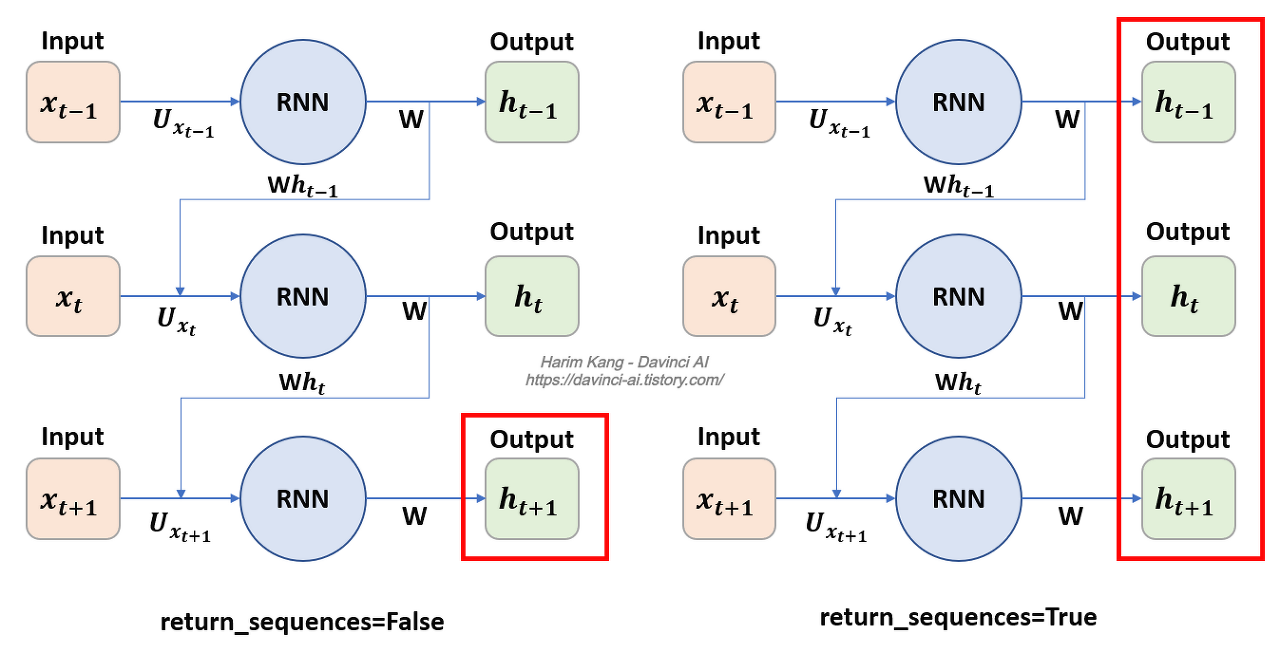

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding  

model = Sequential()

model.add(Embedding(input_dim = 10000, output_dim = 32))
# 전체 상태 시퀀스를 반환
model.add(SimpleRNN(32, return_sequences = True))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(pad_X_train, y_train, 
                    batch_size = 32, epochs = 15, 
                    validation_split = 0.2)

Epoch 1/15
625/625 [==============================] - 68s 108ms/step - loss: 0.6602 - acc: 0.5815 - val_loss: 0.6594 - val_acc: 0.5725
Epoch 2/15
625/625 [==============================] - 67s 108ms/step - loss: 0.6126 - acc: 0.6192 - val_loss: 0.6053 - val_acc: 0.6263
Epoch 3/15
625/625 [==============================] - 66s 106ms/step - loss: 0.7041 - acc: 0.5337 - val_loss: 0.7013 - val_acc: 0.5035
Epoch 4/15
625/625 [==============================] - 63s 101ms/step - loss: 0.6806 - acc: 0.5475 - val_loss: 0.6508 - val_acc: 0.5899
Epoch 5/15
625/625 [==============================] - 62s 100ms/step - loss: 0.6595 - acc: 0.5768 - val_loss: 0.6404 - val_acc: 0.6044
Epoch 6/15
625/625 [==============================] - 62s 100ms/step - loss: 0.6343 - acc: 0.5995 - val_loss: 0.6217 - val_acc: 0.6151
Epoch 7/15
625/625 [==============================] - 62s 99ms/step - loss: 0.6042 - acc: 0.6257 - val_loss: 0.6156 - val_acc: 0.6214
Epoch 8/15
625/625 [==============================] - 62

#### 학습 과정 그리기(시퀀스 출력)

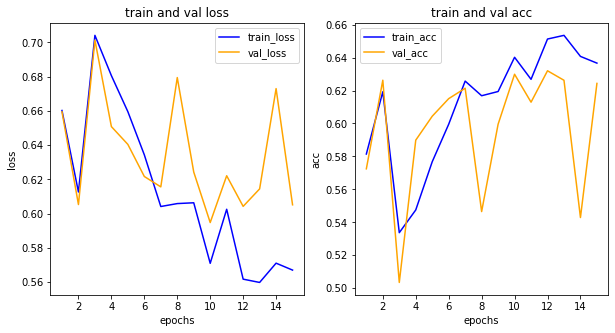

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

#### SimpleRNN 층의 출력값 변화 확인하기(시퀀스 출력 X)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding  

model = Sequential()

model.add(Embedding(input_dim = 10000, output_dim = 32))
# 마지막 시점의 상태 시퀀스만 반환
model.add(SimpleRNN(32, return_sequences = False))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(pad_X_train, y_train, 
                    batch_size = 32, epochs = 15, 
                    validation_split = 0.2)

Epoch 1/15
625/625 [==============================] - 63s 99ms/step - loss: 0.6591 - acc: 0.6054 - val_loss: 0.6106 - val_acc: 0.6614
Epoch 2/15
625/625 [==============================] - 63s 100ms/step - loss: 0.4315 - acc: 0.8027 - val_loss: 0.4276 - val_acc: 0.8134
Epoch 3/15
625/625 [==============================] - 62s 99ms/step - loss: 0.2121 - acc: 0.9198 - val_loss: 0.4705 - val_acc: 0.8264
Epoch 4/15
625/625 [==============================] - 63s 101ms/step - loss: 0.1061 - acc: 0.9632 - val_loss: 0.9401 - val_acc: 0.6274
Epoch 5/15
625/625 [==============================] - 65s 104ms/step - loss: 0.4872 - acc: 0.7675 - val_loss: 0.6304 - val_acc: 0.6816
Epoch 6/15
625/625 [==============================] - 65s 103ms/step - loss: 0.2874 - acc: 0.8804 - val_loss: 0.5530 - val_acc: 0.8354
Epoch 7/15
625/625 [==============================] - 67s 107ms/step - loss: 0.1400 - acc: 0.9477 - val_loss: 0.5663 - val_acc: 0.7838
Epoch 8/15
625/625 [==============================] - 66s

#### 학습 과정 그리기(시퀀스 출력 X)

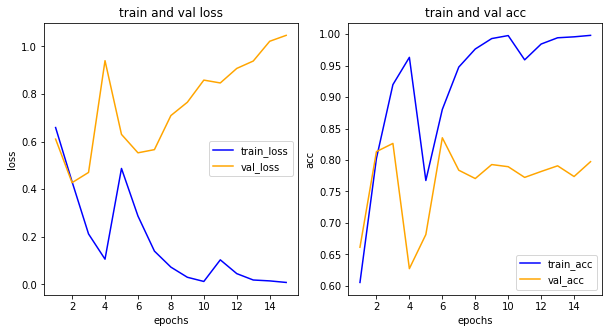

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()